In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from  scipy.stats import norm
plt.style.use('fivethirtyeight')

In [78]:
data = wb.DataReader('TSLA',data_source='yahoo',start = '2007-01-01')['Adj Close']

In [79]:
data = pd.DataFrame(data)

In [80]:
returns = np.log(data/data.shift(1))

In [81]:
m = returns.mean()

In [103]:
var = returns.var()
s = returns.std()

In [156]:
[m,var]

[Adj Close    0.001955
 dtype: float64,
 Adj Close    0.001249
 dtype: float64]

In [157]:
drift = m-var*0.5

In [158]:
type(drift)

pandas.core.series.Series

In [159]:
iterations = 1000
intervels = 10

In [160]:
c = np.random.rand(10,2)

In [161]:
cf = norm.ppf(c)

In [162]:
s = np.array(s)

In [163]:
drift = np.array(drift)

In [164]:
np.array(drift)

array([0.00133])

In [165]:
daily_returns = np.exp(drift+s * norm.ppf(np.random.rand(10,1000)))

In [177]:
daily_returns

array([[1.00543727, 1.00137704, 0.94603509, ..., 0.9796343 , 1.03771045,
        0.98047643],
       [0.96663276, 1.04079769, 1.03897167, ..., 0.9756164 , 0.98964695,
        0.95792179],
       [1.02639556, 0.94808338, 0.99037349, ..., 1.00031612, 1.00590519,
        1.00934726],
       ...,
       [1.04651814, 1.02127904, 1.0199888 , ..., 1.0210283 , 1.01048643,
        1.04183821],
       [1.07221925, 0.97567077, 1.00115607, ..., 0.99919755, 1.04331856,
        1.03699529],
       [1.00123611, 0.98295845, 1.0419667 , ..., 0.96574624, 1.08999465,
        1.12569812]])

In [170]:
prices = np.zeros_like(daily_returns)

In [174]:
s0 = data.iloc[-1]

In [175]:
prices[0] = s0
prices

array([[870.69000244, 870.69000244, 870.69000244, ..., 870.69000244,
        870.69000244, 870.69000244],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [179]:
for i in range(1,10):
    prices[i] = prices[i-1]* daily_returns[i]

In [184]:
prices = pd.DataFrame(prices)

<AxesSubplot:>

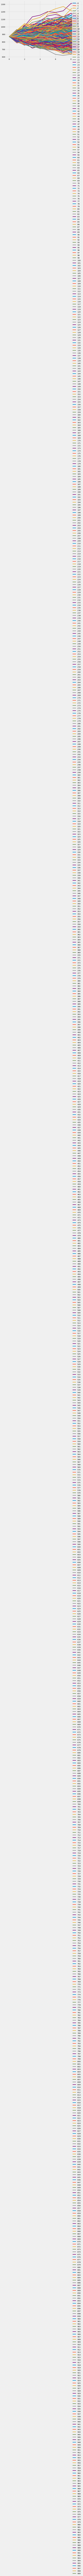

In [187]:
prices.plot(figsize=(10,8))

In [188]:
prices

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,...,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002,870.690002
1,841.637483,906.212144,904.622250,815.201418,853.765465,849.165517,854.600860,911.498102,879.567068,896.100708,...,904.041425,893.418840,917.184902,851.849102,887.476306,856.244975,863.347324,849.459449,861.675704,834.052929
2,863.852976,859.164671,895.913899,788.891774,849.625444,838.731339,848.034891,882.518212,861.536671,866.397088,...,914.438645,911.236965,865.611144,870.517354,896.474723,794.437719,891.213834,849.727980,866.764064,841.849039
3,870.796533,802.537352,907.295500,797.888048,831.235107,882.222341,873.368026,869.679056,868.244892,842.012057,...,891.672958,937.214689,845.980301,883.665027,896.832156,820.143273,865.834813,846.055175,852.396806,843.577851
4,829.516380,835.836163,941.022275,801.029758,834.464021,911.898422,864.516446,912.674613,819.353209,837.159778,...,900.009917,971.358530,907.711669,917.070256,866.138700,823.689463,812.826943,852.271539,877.781566,818.917976
5,886.756339,815.642418,934.021148,834.866275,834.128750,896.279498,847.012090,870.398379,801.291361,806.053279,...,885.361634,932.406063,894.601413,925.946021,886.898588,758.105431,808.235708,889.771059,854.511106,770.560036
6,928.510686,817.664920,939.562119,867.508423,831.775845,896.090368,866.418416,835.614498,763.995760,810.059161,...,861.072703,989.882205,861.417818,933.308742,829.308966,807.328397,809.092413,890.390230,827.236977,782.495726
7,971.703276,835.064044,958.342842,864.605650,853.826677,935.826155,860.455184,762.147299,731.274653,825.542271,...,910.665986,988.061624,828.098083,969.267268,792.180756,779.170138,791.255949,909.113626,835.911739,815.233946
8,1041.878955,814.747580,959.450757,841.206693,782.534052,887.037150,896.270962,826.442761,738.922746,787.496548,...,946.681540,965.924530,814.377134,981.972636,834.380830,825.356714,827.694790,908.384109,872.122229,845.393759
9,1043.166828,800.863021,999.715737,862.591638,820.317311,899.107967,958.940101,835.932608,689.772853,775.454166,...,967.802542,967.901871,785.763699,971.431159,859.584252,832.464104,825.519373,877.268534,950.608563,951.658167
